# Interférences à N ondes

On s'intéresse à la superpositon de $N$ ondes monochromatiques, de même amplitude :
$$s_k(M, t) = S_m \cos(\omega t - \varphi_k(M))$$

On se limite au cas particulier où les phases $\varphi_k(M)$ sont en progression arithmétique, c'est-à-dire au cas où :
$$\varphi_{k+1}(M) = \varphi_{k}(M) + \varphi.$$

Dans le cas simple où $\varphi_0 = 0$, on a donc $\varphi_1 = \varphi$, $\varphi_2 = 2 \varphi$, etc. Soit : $$\varphi_k = k \varphi.$$

In [29]:
%matplotlib notebook
# Librairies pour l'interaction
from ipywidgets import interact, FloatSlider, Layout, IntSlider
import ipywidgets as widgets

In [30]:
# Librairies usuelles
import matplotlib.pyplot as plt
import numpy as np

## Première approche : avec la représentation de Fresnel

On veut tracer la représentation de Fresnel de la somme des N ondes. Pour cela, on se place à $t=0$, alors $s_k(M,t) = S_m \cos\left[-\varphi_k(M)\right]$. Les coordonnées du vecteur de Fresnel correspondant sont $S_m \cos\left[-\varphi_k(M)\right]$ selon $x$ et $S_m \sin\left[-\varphi_k(M)\right]$ selon $y$.

In [31]:
# Paramètres numériques
N = 8 # Nombre de sinusoïdes à additionner
Sm = 2 # Amplitude


def I(phi):
    """Calcule l'intensité résultante.
    Argument : phi, un flottant égal au déphasage d'une onde à l'autre.
    Retourne : I, un flottant égal àl'intensité résultante. 
    La formule utilisée peut s'établir sans trop de difficultés (voir le TD).
    """
    return (np.sin(N*phi/2)/(N*np.sin(phi/2)))**2

<IPython.core.display.Javascript object>


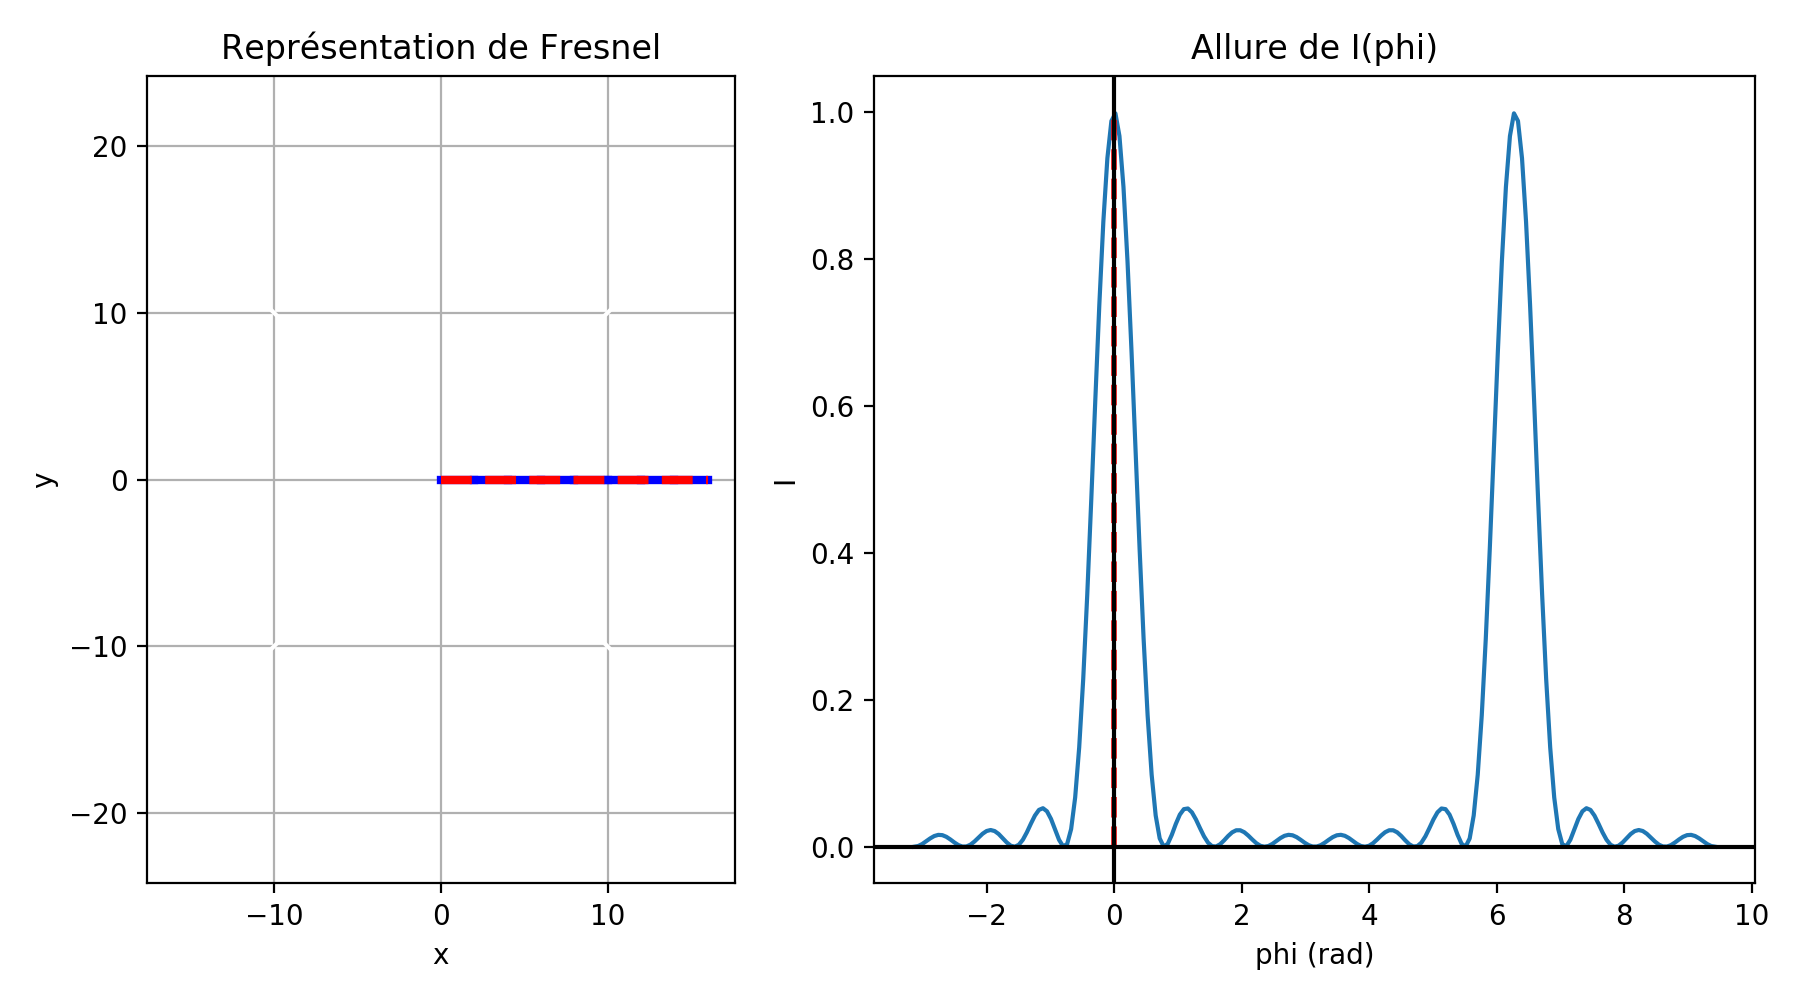

interactive(children=(FloatSlider(value=1e-08, description='phi', layout=Layout(width='100%'), max=9.424777960…

<function __main__.update(phi)>

In [32]:
# Initialisation des deux graphiques (un pour la représentation de Fresnel, un pour l'intensité).
f, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[2, 3]}, figsize=(9,5))

phi0 = 1e-8 # On initialise phi à 0  (ou presque pour ne pas avoir de division par 0 dans I(phi))

# Représentation de I(phi)

phi = np.linspace(-np.pi,3*np.pi,200)
ax1.plot(phi, I(phi)) 
lphi, = ax1.plot([phi0, phi0],[0, I(phi0)], '--', color='red', lw=2)

plt.xlabel("phi (rad)")
plt.ylabel("I")
ax1.axvline(0, color="k")
ax1.axhline(0, color="k")
ax1.set_title('Allure de I(phi)')


# Représentations de Fresnel

# Astuce pour la mise à l'échelle initiale
ax0.plot([-N*Sm, N*Sm],[-N*Sm, N*Sm],color='white')
ax0.plot([-N*Sm, N*Sm],[N*Sm, -N*Sm],color='white')

# Les représentations de fresnel elles-mêmes
l_f = []
x1, y1 = 0, 0
xtot, ytot = 0, 0
for i in range(N):
    # Coordonnées d'un vecteur de Fresnel
    xf = Sm*np.cos(-i*phi0)
    yf = Sm*np.sin(-i*phi0)
    # Qu'on additionne pour avoir les coordonnées de la somme.
    x2 = x1 + xf
    y2 = y1 + yf
    xtot += xf
    ytot += yf
    fresnel, = ax0.plot([x1, x2], [y1, y2], lw=3, color="blue")
    l_f.append(fresnel)
    x1, y1 = x2, y2

fresnel_somme, = ax0.plot([0, xtot], [0, ytot], lw=3, color="red", ls='--')

ax0.set_title('Représentation de Fresnel')
ax0.set_xlabel("x")
ax0.set_ylabel("y")
ax0.grid()
ax0.axis('equal')


f.tight_layout()

def update(phi):
    """Met à jour le graphique"""
    x1, y1 = 0, 0
    xtot, ytot = 0, 0
    lphi.set_data([phi,phi], [0,I(phi)])
    for i, fresnel in enumerate(l_f):
        # Coordonnées d'un vecteur de Fresnel
        xf = Sm*np.cos(-i*phi)
        yf = Sm*np.sin(-i*phi)
        # Qu'on additionne pour avoir les coordonnées de la somme.
        x2 = x1 + xf
        y2 = y1 + yf
        xtot += xf
        ytot += yf
        fresnel.set_data([x1, x2], [y1, y2])
        x1, y1 = x2, y2
    fresnel_somme.set_data([0, xtot], [0, ytot])


# La règle qui permet de modifier les valeurs de phi.
Nsl = 20
phi_widget = FloatSlider(min=1e-8, max=3*np.pi, value=phi0, step=np.pi/Nsl, layout=Layout(width='100%'))

interact(update,phi=phi_widget)

## Deuxième approche : calcul de l'intesnité avec la représentation complexe.

Si l'on ne sait pas établir l'expression utilisée pour `I(phi)` dans la partie précedente, on peut utiliser la représentation complexe :
$$\underline{s}_k(M, t) = S_m \mathrm{e}^{j (\omega t - \varphi_k(M))} = \underline{S}_{m,k} \mathrm{e}^{j \omega t} \qquad
\text{avec}  \qquad \underline{S}_{m, k} = s_0 \mathrm{e}^{-j \varphi_i(M)}.$$


Le code ci-dessous définit les amplitudes complexes $\underline{S}_{m, k}$, notées `Sm(phi, k)`.

In [33]:
Sm = 1  # Amplitude arbitraire


def Smbar(phi, k):
    return Sm * np.exp(-1j * k * phi)

On calcule ensuite l'amplitude complexe de l'onde totale :
$$\underline S_\mathrm{tot}  = \sum_{k= 0}^{N-1} \underline S_{m,i}.$$

In [34]:
def Stot(phi, N):
    res = 0
    for k in range(N):
        res += Smbar(phi, k)
    return res

On montre facilement que l'intensité lumineuse associée est donnée alors par :
$$I = \frac{K}{2} |\underline{S}_\mathrm{tot}|^2.$$

In [35]:
def I(phi, N):
    # On prend le facteur K égal à 1
    return abs(Stot(phi, N))**2 / 2

On peut ensuite tracer l'allure de $I(\varphi)$ pour différentes valeurs de $N$. 

<IPython.core.display.Javascript object>


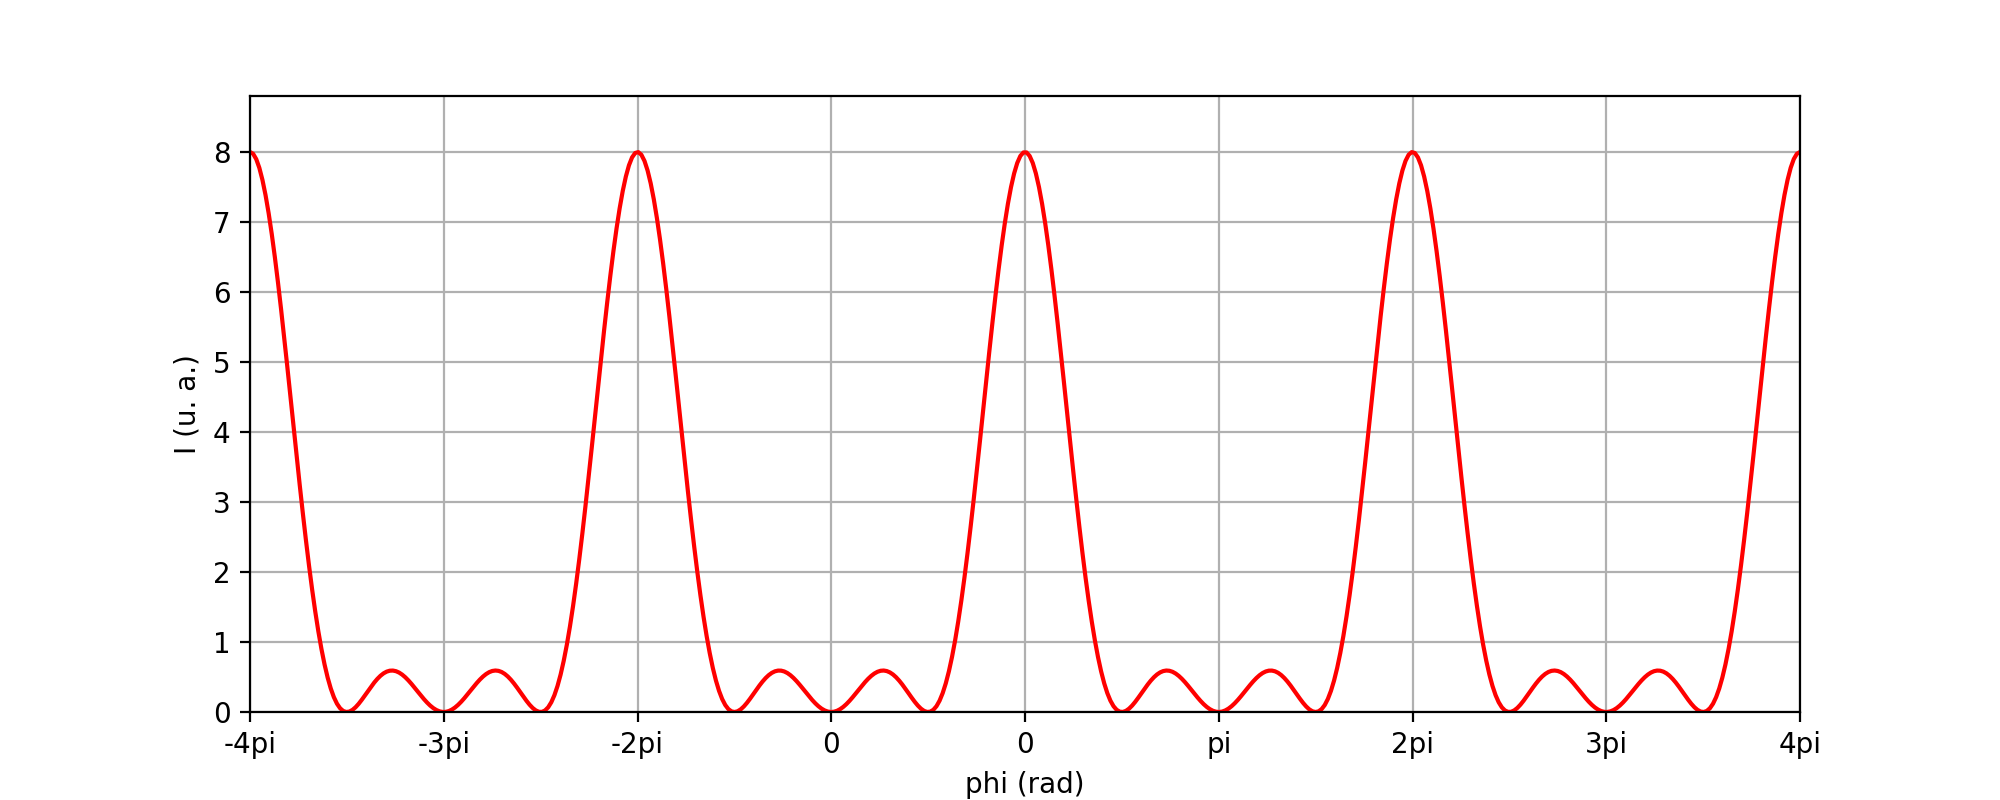

interactive(children=(IntSlider(value=4, description='N', layout=Layout(width='100%'), max=20, min=1), Output(…

<function __main__.update_N(N=4)>

In [36]:
# Le code qui génère le graphique interactif, dont la compréhension n'est pas nécessaire


# Tracé du graphique
phimax = 4 * np.pi
npoints = 500
phi = np.linspace(-phimax, phimax, npoints)

fig = plt.figure(figsize=(10, 4))
plt.grid()

l_I, = plt.plot(phi, I(phi, 4), c='red')

ax = plt.gca()

plt.xlabel("phi (rad)")
plt.ylabel("I (u. a.)")
plt.xlim([-phimax, phimax])

x = [k*np.pi for k in range(-4,5)]
labels = [(str(k)+'pi' if abs(k) > 1 else ('pi' if k==1 else '0')) for k in range(-4,5)]
plt.xticks(x, labels)

# Gestion des mises à jour lorsqu'on déplace le curseur

N_widget = IntSlider(min=1, max=20, value=4,
                     layout=Layout(width='100%'))


def update_N(N=4):
    """Met à jour le graphique lorsqu'on déplace le curseur"""
    l_I.set_data(phi, I(phi, N))
    ax.relim()
    ax.set_ylim([0, 1.1 * max(I(phi, N))])


interact(update_N, N=N_widget)